https://terpconnect.umd.edu/~toh/spectrum/CurveFittingB.html

Elapsed time is 0.114093 seconds.
[0.99853647 0.50053236 0.30068646]


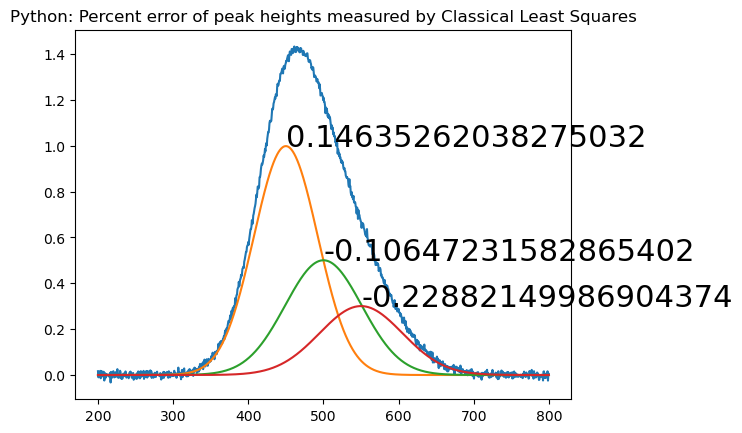

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from pytictoc import TicToc
t = TicToc()
t.tic()

# Define a Gaussian peak function
def gaussian(x, center, amplitude, width):
    # This generates a single peak with a gaussian lineshape, 
    # with a specific center, amplitude, and width.
    # width is the FWHM (full width at half maximum)
    return amplitude*np.exp(-((x-center)/(0.60056120439323*width))**2)

# Create a set of spectra G representing the components of the mixture
NumPoints=1000
X=np.linspace(200,800,NumPoints) 
center1=450
G1=gaussian(X,center1,1,100)
center2=500
G2=gaussian(X,center2,1,120)
center3=550
G3=gaussian(X,center3,1,130)

E=np.c_[G1,G2,G3] # compose the separate G vectors into a matrix E
noiseamp=.01 
# Specify the amplitudes of the components in the mixture
amp1=1 # Amplitude (height) of peak 1
amp2=.5 # Amplitude (height) of peak 2
amp3=.3 # Amplitude (height) of peak 2
# Compute the simulated noisy mixture spectrum 
A=amp1*G1+amp2*G2+amp3*G3+noiseamp*np.random.randn(len(X))  
 
t.tic() # Start clock for execution timimg
# Apply normal equation to compute concentration vector C
C = inv(E.T.dot(E)).dot(E.T).dot(A)

plt.plot(X,A)
plt.plot(X,C[0]*G1)
plt.plot(X,C[1]*G2)
plt.plot(X,C[2]*G3)
PercentDifference1=100*(amp1-C[0])/amp1
PercentDifference2=100*(amp2-C[1])/amp2
PercentDifference3=100*(amp3-C[2])/amp3
plt.text(center1,C[0],PercentDifference1, fontsize=22)
plt.text(center2,C[1],PercentDifference2, fontsize=22)
plt.text(center3,C[2],PercentDifference3, fontsize=22)
plt.title('Python: Percent error of peak heights measured by Classical Least Squares')
t.toc()  # stop clock and print elapsed time
 
print(C) # Print measured amplitudes